In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 16,
        "font.size": 16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
}

matplotlib.rcParams.update(nice_fonts)

In [3]:
import seaborn as sns
sns.set_context(rc=nice_fonts)   

In [4]:
# Load some data
    
obs_bc = []
gt_bc = []
gt_sink = []
gt_tcn = []
obs_bc_hung = []
obs_sink = []
obs_tcn_hung = []
obs_tcn = []
for seed in range(1,21):
    try:
        gt_bc.append(np.genfromtxt('gt_actions_bc_%02d.txt'%seed))
        obs_bc.append(np.genfromtxt('actions_bc_%02d.txt'%seed))
        obs_bc_hung.append(np.genfromtxt('actions_bc_hung_%02d.txt'%seed))
        gt_sink.append(np.genfromtxt('gt_actions_sink_%02d.txt'%seed))
        obs_sink.append(np.genfromtxt('actions_sink_%02d.txt'%seed))
        gt_tcn.append(np.genfromtxt('gt_actions_tcn_%02d.txt'%seed))
        obs_tcn_hung.append(np.genfromtxt('actions_tcn_hung_%02d.txt'%seed))
        obs_tcn.append(np.genfromtxt('actions_tcn_%02d.txt'%seed))
    except:
        continue;

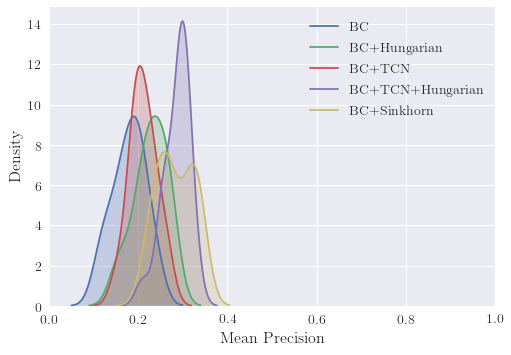

BC 0.18 +- 0.04
BC+Hung 0.23 +- 0.04
BC+TCN 0.21 +- 0.03
BC+TCN+Hung 0.29 +- 0.03
BC+Sink 0.28 +- 0.04


In [5]:
# Check if order is the same as labels - not a great test, because multiple ways to build a tower
pre_bc = [np.mean(np.all(x==y,axis=1)) for x,y in zip(np.stack(gt_bc),np.stack(obs_bc))]
pre_bc_hung = [np.mean(np.all(x==y,axis=1)) for x,y in zip(np.stack(gt_bc),np.stack(obs_bc_hung))]

pre_tcn = [np.mean(np.all(x==y,axis=1)) for x,y in zip(np.stack(gt_tcn),np.stack(obs_tcn))]
pre_tcn_hung = [np.mean(np.all(x==y,axis=1)) for x,y in zip(np.stack(gt_tcn),np.stack(obs_tcn_hung))]

pre_sink = [np.mean(np.all(x==y,axis=1)) for x,y in zip(np.stack(gt_sink),np.stack(obs_sink))]

sns.kdeplot(pre_bc,gridsize=(100),shade=True,label='BC',clip=(0,1))
sns.kdeplot(pre_bc_hung,gridsize=(100),shade=True,label='BC+Hungarian',clip=(0,1))
sns.kdeplot(pre_tcn,gridsize=(100),shade=True,label='BC+TCN',clip=(0,1))
sns.kdeplot(pre_tcn_hung,gridsize=(100),shade=True,label='BC+TCN+Hungarian',clip=(0,1))
sns.kdeplot(pre_sink,gridsize=(100),shade=True,label='BC+Sinkhorn',clip=(0,1))
plt.legend(loc='upper right')
plt.xlabel('Mean Precision')
plt.ylabel('Density')
plt.savefig('Mean_average_precision.pdf')
plt.xlim(0,1)
plt.show()

print('BC %2.2f +- %2.2f'%(np.mean(pre_bc),np.std(pre_bc)))
print('BC+Hung %2.2f +- %2.2f'%(np.mean(pre_bc_hung),np.std(pre_bc_hung)))
print('BC+TCN %2.2f +- %2.2f'%(np.mean(pre_tcn),np.std(pre_tcn)))
print('BC+TCN+Hung %2.2f +- %2.2f'%(np.mean(pre_tcn_hung),np.std(pre_tcn_hung)))
print('BC+Sink %2.2f +- %2.2f'%(np.mean(pre_sink),np.std(pre_sink)))

In [6]:
def check_reps(obs_in):
    bc_counts = []
    for obs in np.vstack(obs_in):
        _,count = np.unique(obs,return_index=False,return_inverse=False,return_counts=True)
        bc_counts.append(np.sum(count>1))
    return np.sum(bc_counts)/np.vstack(obs_in).shape[0]

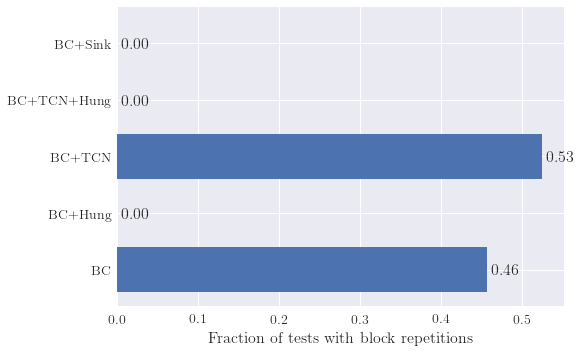

In [7]:
# Block re-use is bad because you can't pick up a block you've already build with (tower collapse)

counts_bc = check_reps(obs_bc)
counts_bc_hung = check_reps(obs_bc_hung)
counts_tcn = check_reps(obs_tcn)
counts_tcn_hung = check_reps(obs_tcn_hung)
counts_sink = check_reps(obs_sink)

plt.barh(np.arange(5),[counts_bc,counts_bc_hung,counts_tcn,counts_tcn_hung,counts_sink])

for i, v in enumerate([counts_bc,counts_bc_hung,counts_tcn,counts_tcn_hung,counts_sink]):
    plt.text(v + 0.005, i-0.1, "%2.2f"%v, fontweight='bold')
plt.xlabel('Fraction of tests with block repetitions')
plt.yticks(np.arange(5),['BC','BC+Hung','BC+TCN','BC+TCN+Hung','BC+Sink'])
plt.show()


In [8]:
def check_block_color(x,y):
    x[x==1]=0
    x[x==3]=2
    x[x==5]=4
    y[y==1]=0
    y[y==3]=2
    y[y==5]=4
    return np.all(x==y,axis=1)

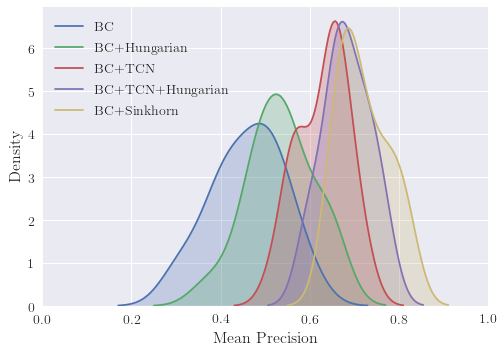

BC 0.46 +- 0.08
BC+Hung 0.53 +- 0.07
BC+TCN 0.63 +- 0.05
BC+TCN+Hung 0.68 +- 0.05
BC+Sink 0.72 +- 0.05


In [9]:
pre_bc = [np.mean(check_block_color(x,y)) for x,y in zip(np.stack(gt_bc),np.stack(obs_bc))]
pre_bc_hung = [np.mean(check_block_color(x,y)) for x,y in zip(np.stack(gt_bc),np.stack(obs_bc_hung))]

pre_tcn = [np.mean(check_block_color(x,y)) for x,y in zip(np.stack(gt_tcn),np.stack(obs_tcn))]
pre_tcn_hung = [np.mean(check_block_color(x,y)) for x,y in zip(np.stack(gt_tcn),np.stack(obs_tcn_hung))]

pre_sink = [np.mean(check_block_color(x,y)) for x,y in zip(np.stack(gt_sink),np.stack(obs_sink))]

sns.kdeplot(pre_bc,gridsize=(100),shade=True,clip=(0,1),label='BC')
sns.kdeplot(pre_bc_hung,gridsize=(100),shade=True,clip=(0,1),label='BC+Hungarian')
sns.kdeplot(pre_tcn,gridsize=(100),shade=True,clip=(0,1),label='BC+TCN')
sns.kdeplot(pre_tcn_hung,gridsize=(100),shade=True,clip=(0,1),label='BC+TCN+Hungarian')
sns.kdeplot(pre_sink,gridsize=(100),shade=True,clip=(0,1),label='BC+Sinkhorn')
plt.xlim(0,1)
plt.legend()
plt.xlabel('Mean Precision')
plt.ylabel('Density')
plt.savefig('Mean_average_colour_precision.pdf')
plt.show()

print('BC %2.2f +- %2.2f'%(np.mean(pre_bc),np.std(pre_bc)))
print('BC+Hung %2.2f +- %2.2f'%(np.mean(pre_bc_hung),np.std(pre_bc_hung)))
print('BC+TCN %2.2f +- %2.2f'%(np.mean(pre_tcn),np.std(pre_tcn)))
print('BC+TCN+Hung %2.2f +- %2.2f'%(np.mean(pre_tcn_hung),np.std(pre_tcn_hung)))
print('BC+Sink %2.2f +- %2.2f'%(np.mean(pre_sink),np.std(pre_sink)))